# Phần này sử dụng bộ dữ liệu của Ủy ban Bầu cử Liên bang Hoa Kỳ (FEC) năm 2012 để phân tích dữ liệu đóng góp chính trị (donations) trong cuộc bầu cử tổng thống

## 1. Định nghĩa vấn đề

Bài toán này tập trung vào việc phân tích dữ liệu quyên góp chính trị trong cuộc bầu cử tổng thống Hoa Kỳ năm 2012, do Ủy ban Bầu cử Liên bang (FEC) công bố.

Bộ dữ liệu ghi lại các khoản quyên góp cá nhân cho các ứng cử viên tổng thống, bao gồm thông tin chi tiết về:

* Người đóng góp (tên, nghề nghiệp, nơi làm việc, địa chỉ),

* Ứng cử viên nhận quyên góp,

* Số tiền và thời gian quyên góp.

Mục tiêu của vấn đề

Phân tích dữ liệu nhằm:

* Xác định đặc điểm của nhóm người ủng hộ (nghề nghiệp, khu vực, tổ chức).

* Tìm hiểu xu hướng quyên góp theo thời gian, địa lý và mức độ đóng góp.

* Đưa ra cái nhìn tổng quan về hành vi tài trợ chính trị trong kỳ bầu cử năm 2012.

## 2. Các bước thực hiện

### Đọc dữ liệu quyên góp từ tệp CSV của Ủy ban Bầu cử Liên bang (FEC)

In [1]:
import pandas as pd
fec = pd.read_csv("pydata-book-3rd-edition/datasets/fec/P00000001-ALL.csv", low_memory=False) 
fec.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [2]:
#Xem thông tin chi tiết của một dòng cụ thể trong DataFrame
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                        50.0
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [ ]:
# Lấy danh sách các ứng cử viên duy nhất trong cột cand_nm
unique_cands = fec["cand_nm"].unique() 
unique_cands 

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [4]:
#Truy cập phần tử thứ 3 trong danh sách ứng cử viên
unique_cands[2] 


'Obama, Barack'

### Tạo từ điển ánh xạ tên ứng cử viên sang đảng phái chính trị

In [5]:
parties = {"Bachmann, Michelle": "Republican", 
 "Cain, Herman": "Republican", 
 "Gingrich, Newt": "Republican", 
 "Huntsman, Jon": "Republican", 
 "Johnson, Gary Earl": "Republican", 
 "McCotter, Thaddeus G": "Republican", 
 "Obama, Barack": "Democrat", 
 "Paul, Ron": "Republican", 
 "Pawlenty, Timothy": "Republican", 
 "Perry, Rick": "Republican", 
 "Roemer, Charles E. 'Buddy' III": "Republican", 
 "Romney, Mitt": "Republican", 
 "Santorum, Rick": "Republican"} 


In [6]:
#Xem tên ứng cử viên tại một số dòng dữ liệu
fec["cand_nm"][123456:123461] 

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [7]:
#Kiểm tra đảng phái của các ứng cử viên tại các dòng trên
fec["cand_nm"][123456:123461].map(parties) 

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

### Thêm cột “party” (đảng phái) vào DataFrame và đếm số lượng theo đảng

In [8]:
fec["party"] = fec["cand_nm"].map(parties) 
fec["party"].value_counts() 


party
Democrat      593746
Republican    407985
Name: count, dtype: int64

In [9]:
#Kiểm tra số lượng đóng góp dương (đóng góp hợp lệ)
(fec["contb_receipt_amt"] > 0).value_counts()

contb_receipt_amt
True     991475
False     10256
Name: count, dtype: int64

In [10]:
#Lọc dữ liệu, chỉ giữ lại các khoản đóng góp có giá trị dương
fec = fec[fec["contb_receipt_amt"] > 0] 

In [11]:
#Tạo tập dữ liệu con chỉ gồm hai ứng cử viên Obama và Romney
fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]
fec_mrbo

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,091280020,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,091280005,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,090120092,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701381,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,NaN,NaN,NaN,SA17A,787803,Democrat
701382,C00431445,P80003338,"Obama, Barack","TAITANO, TYRONE",HAGATNA,ZZ,969323373,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,NaN,NaN,NaN,SA17A,775668,Democrat
701383,C00431445,P80003338,"Obama, Barack","TUCKER, PAMELA",APO,ZZ,963190030,DODEA,EDUCATOR,3.0,20-JAN-12,NaN,NaN,NaN,SA17A,775668,Democrat
701384,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,NaN,NaN,NaN,SA17A,785239,Democrat


In [12]:
#Thống kê top 10 nghề nghiệp của người đóng góp
fec["contbr_occupation"].value_counts()[:10] 

contbr_occupation
RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: count, dtype: int64

In [13]:
#Tạo bảng ánh xạ các nghề nghiệp tương tự nhau
occ_mapping = { 
 "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED", 
 "INFORMATION REQUESTED" : "NOT PROVIDED", 
 "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED", 
 "C.E.O.": "CEO" 
} 


### Tạo bảng ánh xạ các nghề nghiệp tương tự nhau

In [14]:
def get_occ(x): 
 # If no mapping provided, return x 
 return occ_mapping.get(x, x) 
fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)

### Chuẩn hóa tên nhà tuyển dụng theo bảng ánh xạ riêng

In [15]:
emp_mapping = { 
 "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED", 
 "INFORMATION REQUESTED" : "NOT PROVIDED", 
 "SELF" : "SELF-EMPLOYED", 
 "SELF EMPLOYED" : "SELF-EMPLOYED", 
} 
def get_emp(x): 
 # If no mapping provided, return x 
 return emp_mapping.get(x, x) 
fec["contbr_employer"] = fec["contbr_employer"].map(get_emp) 


## 3. Phân tích khám phá dữ liệu

#### Tính tổng số tiền đóng góp theo nghề nghiệp và đảng phái

In [16]:
by_occupation = fec.pivot_table("contb_receipt_amt", index="contbr_occupation",columns="party", aggfunc="sum") 
over_2mm = by_occupation[by_occupation.sum(axis="columns") > 2000000] 
over_2mm 

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


<Axes: ylabel='contbr_occupation'>

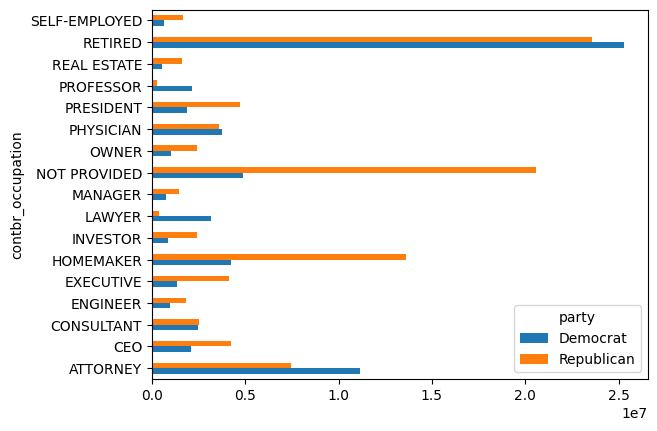

In [17]:
#Vẽ biểu đồ thể hiện tổng đóng góp theo nghề nghiệp và đảng phái
over_2mm.plot(kind="barh") 

In [18]:
#Hàm lấy ra các nghề nghiệp hoặc nhà tuyển dụng đóng góp cao nhất
def get_top_amounts(group, key, n=5): 
 totals = group.groupby(key)["contb_receipt_amt"].sum() 
 return totals.nlargest(n) 


#### Liệt kê top 7 nghề nghiệp đóng góp nhiều nhất cho từng ứng cử viên

In [19]:
grouped = fec_mrbo.groupby("cand_nm") 
grouped.apply(get_top_amounts, "contbr_occupation", n=7)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16288\2705301551.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_top_amounts, "contbr_occupation", n=7)


cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

#### Liệt kê top 10 nhà tuyển dụng đóng góp nhiều nhất cho từng ứng cử viên

In [ ]:
#
grouped.apply(get_top_amounts, "contbr_employer", n=10)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16288\629576265.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_top_amounts, "contbr_employer", n=10)


cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

#### Chia các khoản đóng góp thành nhóm theo giá trị (bins)

In [21]:
import numpy as np
bins = np.array([0, 1, 10, 100, 1000, 10000, 100_000, 1_000_000, 10_000_000]) 
labels = pd.cut(fec_mrbo["contb_receipt_amt"], bins) 
labels 


411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

#### Đếm số khoản đóng góp trong mỗi nhóm giá trị theo ứng cử viên

In [22]:
grouped = fec_mrbo.groupby(["cand_nm", labels]) 
grouped.size().unstack(level=0) 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16288\3130585003.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = fec_mrbo.groupby(["cand_nm", labels])


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


#### Chuẩn hóa tỷ lệ đóng góp trong từng nhóm giá trị

In [23]:
bucket_sums = grouped["contb_receipt_amt"].sum().unstack(level=0) 
normed_sums = bucket_sums.div(bucket_sums.sum(axis="columns"), axis="index") 
normed_sums 

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,0.000000
"(1000000, 10000000]",1.000000,0.000000


<Axes: ylabel='contb_receipt_amt'>

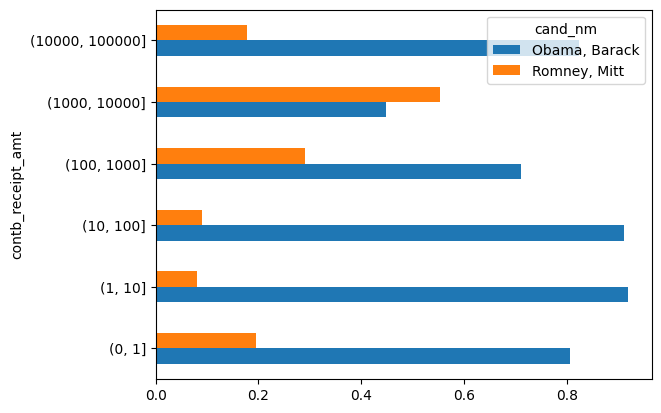

In [24]:
#Vẽ biểu đồ so sánh tỷ lệ đóng góp theo khoảng giá trị
normed_sums[:-2].plot(kind="barh")

#### Tính tổng đóng góp theo từng bang cho mỗi ứng cử viên

In [25]:
grouped = fec_mrbo.groupby(["cand_nm", "contbr_st"]) 
totals = grouped["contb_receipt_amt"].sum().unstack(level=0).fillna(0) 
totals = totals[totals.sum(axis="columns") > 100000] 
totals.head(10) 

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


#### Chuẩn hóa tỷ lệ đóng góp của mỗi bang giữa hai ứng cử viên

In [26]:
percent = totals.div(totals.sum(axis="columns"), axis="index") 
percent.head(10) 

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


### 3.1 Phân tích mô tả


#### Ai là hai ứng cử viên có tổng tiền quyên góp cao nhất?

In [27]:
pd.options.display.float_format = '{:,.0f}'.format
fec.groupby("cand_nm")["contb_receipt_amt"].sum().sort_values(ascending=False)

cand_nm
Obama, Barack                    135,877,427
Romney, Mitt                      88,335,908
Paul, Ron                         21,009,620
Perry, Rick                       20,305,754
Gingrich, Newt                    12,832,770
Santorum, Rick                    11,043,159
Cain, Herman                       7,101,082
Pawlenty, Timothy                  6,004,819
Huntsman, Jon                      3,330,373
Bachmann, Michelle                 2,711,439
Johnson, Gary Earl                   566,962
Roemer, Charles E. 'Buddy' III       373,010
McCotter, Thaddeus G                  39,030
Name: contb_receipt_amt, dtype: float64

#### Trung bình mỗi người quyên góp bao nhiêu cho mỗi ứng cử viên?

Nhận xét:
* Hai ứng cử viên có tổng tiền quyên góp cao nhất là Obama Barack (khoảng 135 triệu USD) và Romney Mitt (khoảng 88 triệu USD).

In [28]:

fec.groupby("cand_nm")["contb_receipt_amt"].mean()

cand_nm
Bachmann, Michelle                 207
Cain, Herman                       354
Gingrich, Newt                     274
Huntsman, Jon                      819
Johnson, Gary Earl                 459
McCotter, Thaddeus G               535
Obama, Barack                      231
Paul, Ron                          147
Pawlenty, Timothy                1,562
Perry, Rick                      1,598
Roemer, Charles E. 'Buddy' III      64
Romney, Mitt                       840
Santorum, Rick                     239
Name: contb_receipt_amt, dtype: float64

Nhận xét:
* Rick Perry và Timothy Pawlenty có mức quyên góp trung bình cao nhất → cho thấy họ nhận được các khoản ủng hộ lớn từ mỗi người quyên góp.
* Jon Huntsman và Mitt Romney cũng có mức trung bình khá cao → chứng tỏ họ có nhóm ủng hộ tương đối mạnh về tài chính.
* Ron Paul, Barack Obama, và Buddy Roemer có mức trung bình thấp → khả năng họ nhận nhiều khoản quyên góp nhỏ, thể hiện sự ủng hộ rộng nhưng giá trị từng khoản thấp.
* Nhìn chung, mức trung bình khác nhau phản ánh chiến lược gây quỹ và tệp người ủng hộ của từng ứng cử viên có sự khác biệt rõ rệt.

#### Các bang (State) nào quyên góp nhiều nhất?

In [29]:

# Tổng tiền quyên góp theo bang
top_states = (
    fec.groupby("contbr_st")["contb_receipt_amt"]
      .sum()
      .sort_values(ascending=False)
)
print(top_states.head(10))

contbr_st
CA   44,592,230
TX   32,378,641
NY   28,229,140
IL   22,669,240
FL   21,793,674
MA   12,365,223
VA   10,024,493
PA    8,755,949
GA    8,033,290
NJ    7,873,148
Name: contb_receipt_amt, dtype: float64


Nhận xét:
* California, Texas và New York là ba bang quyên góp nhiều nhất, cho thấy sức mạnh kinh tế và mức độ tham gia chính trị cao.
* Các bang như Illinois và Florida cũng đóng góp lớn, phản ánh quy mô dân số và hoạt động chính trị sôi động.
* Nhìn chung, các bang có nền kinh tế phát triển thường quyên góp nhiều hơn các bang khác.

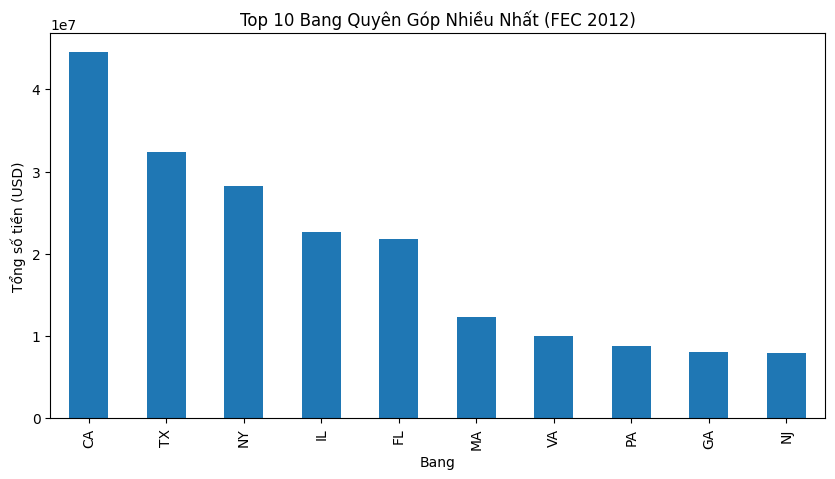

In [30]:
import matplotlib.pyplot as plt

top_states.head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Bang Quyên Góp Nhiều Nhất (FEC 2012)")
plt.ylabel("Tổng số tiền (USD)")
plt.xlabel("Bang")
plt.show()


### 3.2 Phân tích so sánh

#### Giữa Barack Obama và Mitt Romney, ai nhận được nhiều quyên góp nhỏ (<$200) hơn?

In [31]:

# Lọc dữ liệu 2 ứng viên
subset = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]

# Lọc quyên góp nhỏ hơn 200 USD
small_donations = subset[subset["contb_receipt_amt"] < 200]

# Tổng hợp theo ứng viên
small_don_summary = (
    small_donations.groupby("cand_nm")["contb_receipt_amt"]
                   .sum()
                   .sort_values(ascending=False)
)
# Tổng số tiền quyên góp nhỏ hơn 200$ cho hai ứng cử viên
small_don_summary

cand_nm
Obama, Barack   24,197,815
Romney, Mitt     2,460,298
Name: contb_receipt_amt, dtype: float64

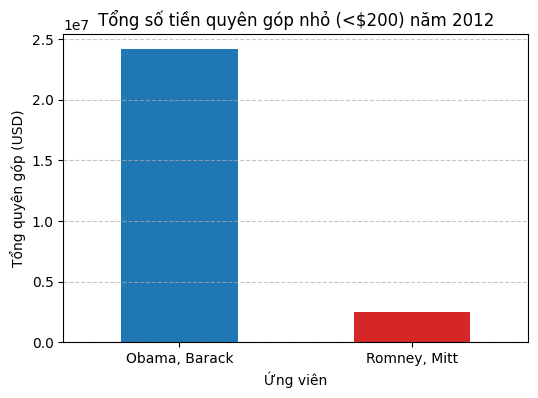

In [32]:
# Vẽ biểu đồ cột
plt.figure(figsize=(6,4))
small_don_summary.plot(kind='bar', color=['#1f77b4', '#d62728'])
plt.title("Tổng số tiền quyên góp nhỏ (<$200) năm 2012")
plt.ylabel("Tổng quyên góp (USD)")
plt.xlabel("Ứng viên")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Nhận xét:
* Dựa vào biểu đồ, Barack Obama nhận được nhiều khoản quyên góp nhỏ (<$200) hơn Mitt Romney — cao hơn rất nhiều lần.
* Điều này cho thấy chiến dịch của Obama có mạng lưới ủng hộ rộng rãi với nhiều người quyên góp nhỏ lẻ, thể hiện sức huy động mạnh từ cơ sở quần chúng.

#### Nghề nghiệp nào đóng góp nhiều nhất cho mỗi bên?

In [33]:
# Tạo nhóm theo ứng viên
grouped = subset.groupby("cand_nm")

# Lấy top 5 nghề nghiệp đóng góp nhiều nhất cho mỗi ứng viên
top_occupations = grouped.apply(get_top_amounts, "contbr_occupation", n=5)
print(top_occupations)


cand_nm        contbr_occupation
Obama, Barack  RETIRED             25,305,116
               ATTORNEY            11,141,983
               NOT PROVIDED         4,866,974
               HOMEMAKER            4,248,876
               PHYSICIAN            3,735,125
Romney, Mitt   RETIRED             11,508,474
               NOT PROVIDED        11,396,895
               HOMEMAKER            8,147,446
               ATTORNEY             5,364,719
               PRESIDENT            2,491,245
Name: contb_receipt_amt, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16288\2396702243.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_occupations = grouped.apply(get_top_amounts, "contbr_occupation", n=5)


In [34]:
pivot_occupation = (
    subset.pivot_table(
        values="contb_receipt_amt",
        index="contbr_occupation",
        columns="cand_nm",
        aggfunc="sum",
        fill_value=0
    )
)

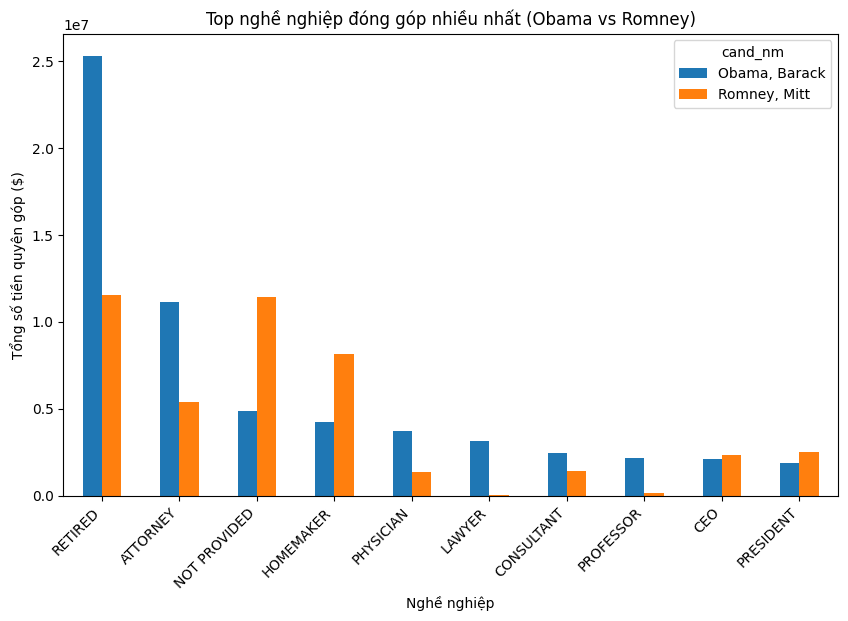

In [35]:
import matplotlib.pyplot as plt
pivot_occupation_sorted = pivot_occupation.sort_values(by="Obama, Barack", ascending=False)
pivot_occupation_sorted.head(10).plot(kind="bar", figsize=(10,6))
plt.title("Top nghề nghiệp đóng góp nhiều nhất (Obama vs Romney)")
plt.ylabel("Tổng số tiền quyên góp ($)")
plt.xlabel("Nghề nghiệp")
plt.xticks(rotation=45, ha="right")
plt.show()


Nhận xét:
* Barack Obama nhận được nhiều quyên góp nhất từ nhóm người nghỉ hưu (Retired), cho thấy ông có được sự ủng hộ mạnh mẽ từ nhóm cử tri lớn tuổi.
* Mitt Romney lại nhận được nhiều nhất từ nhóm nội trợ (Homemaker), phản ánh sự ủng hộ từ các hộ gia đình truyền thống.
* Ngoài ra, các nhóm như luật sư (Attorney) và bác sĩ (Physician) cũng đóng góp đáng kể cho cả hai bên, cho thấy tầng lớp chuyên nghiệp có vai trò quan trọng trong việc tài trợ chiến dịch tranh cử.

### 3.3 Phân tích theo nghề nghiệp và các ngành

#### Có mối quan hệ nào giữa nghề nghiệp (occupation) và định hướng chính trị (ứng viên) không?

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tổng tiền quyên góp theo nghề nghiệp và ứng viên
occupation_pivot = (
    fec.pivot_table(
        values="contb_receipt_amt",
        index="contbr_occupation",
        columns="cand_nm",
        aggfunc="sum",
        fill_value=0
    )
)



In [37]:
# Chuẩn hóa dữ liệu theo hàng
# Mục đích: tính "tỷ lệ ủng hộ" của từng nghề nghiệp cho từng ứng viên
occupation_ratio = occupation_pivot.div(occupation_pivot.sum(axis=1), axis=0)

# Lấy top 20 nghề nghiệp có tổng quyên góp cao nhất
top_occupations = occupation_ratio.sum(axis=1).sort_values(ascending=False).head(20).index



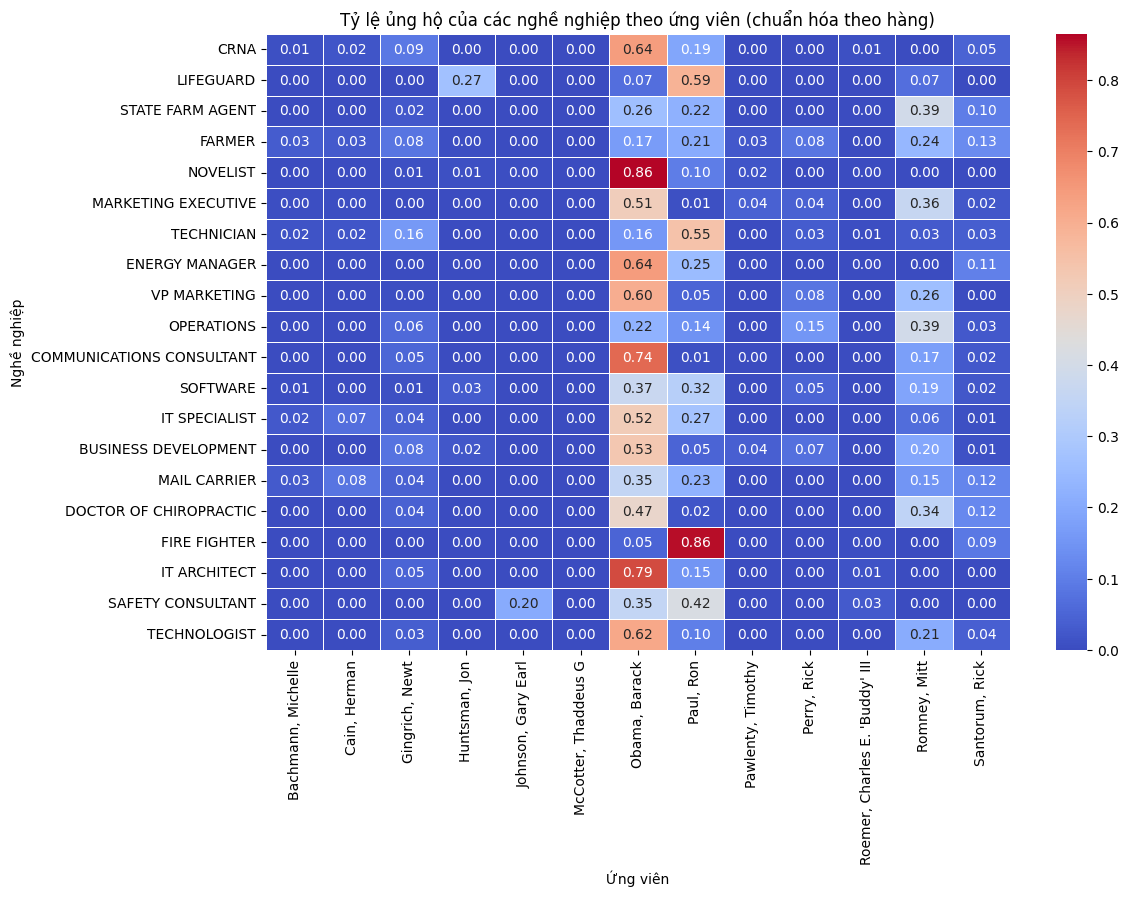

In [38]:
# Vẽ Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(
    occupation_ratio.loc[top_occupations],
    cmap="coolwarm",
    linewidths=0.5,
    annot=True,
    fmt=".2f"
)
plt.title("Tỷ lệ ủng hộ của các nghề nghiệp theo ứng viên (chuẩn hóa theo hàng)")
plt.xlabel("Ứng viên")
plt.ylabel("Nghề nghiệp")
plt.show()


Nhận xét:
* Biểu đồ cho thấy nghề nghiệp có tác động rõ rệt đến định hướng chính trị của ứng cử viên.
* Các nhóm nghề như y tế, giáo dục và sáng tạo có xu hướng ủng hộ Barack Obama (Đảng Dân chủ).
* Trong khi đó, các nghề thuộc lĩnh vực kinh doanh, kỹ thuật và dịch vụ công lại thiên về các ứng viên Đảng Cộng hòa như Romney hay Paul.
* Sự khác biệt này phản ánh cách mỗi nhóm nghề nhìn nhận về chính sách kinh tế, phúc lợi và vai trò của chính phủ trong xã hội.

#### Các ngành (công nghệ, giáo dục, tài chính) có xu hướng ủng hộ đảng nào?

In [ ]:

# Xác định ngành nghề dựa theo contbr_employer
def map_sector(employer):
    employer = str(employer).upper()
    if any(x in employer for x in ["UNIVERSITY", "SCHOOL", "COLLEGE"]):
        return "Education"
    elif any(x in employer for x in ["TECH", "MICROSOFT", "GOOGLE", "APPLE"]):
        return "Tech"
    elif any(x in employer for x in ["BANK", "CAPITAL", "FINANCIAL", "GOLDMAN", "JPMORGAN", "MORGAN STANLEY"]):
        return "Finance"
    else:
        return "Other"

# Thêm cột 'Sector' vào DataFrame
fec["Sector"] = fec["contbr_employer"].apply(map_sector)


In [ ]:
# =============================================
# Tổng hợp quyên góp theo ngành và đảng
# =============================================

# Lọc bỏ ngành 'Other' để tập trung vào nhóm chính
sector_filtered = fec[fec["Sector"] != "Other"]

# Nhóm theo Sector và party, tính tổng số tiền quyên góp
sector_summary = (
    sector_filtered
    .groupby(["Sector", "party"])["contb_receipt_amt"]
    .sum()
    .unstack(fill_value=0)
)

# Tính tổng và sắp xếp giảm dần
sector_summary["Total"] = sector_summary.sum(axis=1)
sector_summary = sector_summary.sort_values(by="Total", ascending=False)

sector_summary


party,Democrat,Republican,Total
Sector,,,
Finance,"2,274,178","7,241,765","9,515,943"
Education,"6,127,935","1,806,613","7,934,548"
Tech,"1,313,374","1,246,272","2,559,647"


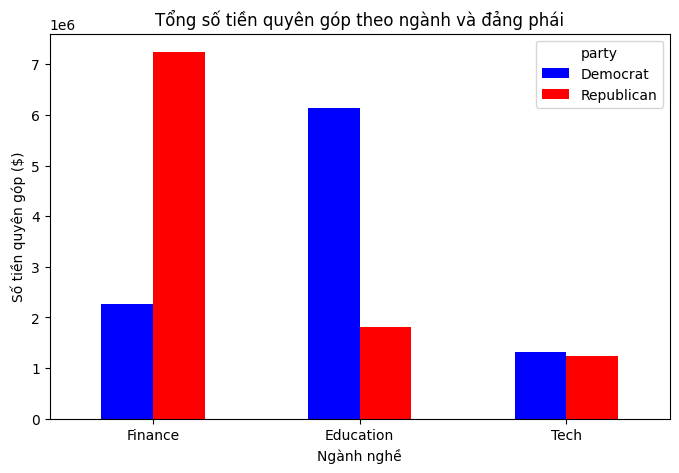

In [ ]:
# =============================================
# Vẽ biểu đồ so sánh giữa hai đảng
# =============================================
sector_summary[["Democrat", "Republican"]].plot(
    kind="bar",
    figsize=(8,5),
    color=["blue", "red"],
    title="Tổng số tiền quyên góp theo ngành và đảng phái"
)
plt.ylabel("Số tiền quyên góp ($)")
plt.xlabel("Ngành nghề")
plt.xticks(rotation=0)
plt.show()


Nhận xét:
* Ngành tài chính (Finance) có xu hướng ủng hộ Đảng Cộng hòa (Republican Party), với số tiền quyên góp cao hơn hẳn so với phía còn lại.
* Ngành giáo dục (Education) lại nghiêng mạnh về Đảng Dân chủ (Democratic Party), thể hiện qua mức đóng góp vượt trội.
* Ngành công nghệ (Tech) có mức quyên góp khá cân bằng giữa hai đảng, không thể hiện xu hướng thiên rõ rệt.

### 3.4 Phân tích theo mức quyên góp

#### Tỷ lệ quyên góp nhỏ (< $1000) so với lớn (> $1000) của mỗi ứng cử viên?

In [ ]:

# Phân chia các khoảng tiền đóng góp
bins = [0, 100, 1000, 10000, 100000, 1000000]
labels = ["< $100", "$100 - $1K", "$1K - $10K", "$10K - $100K", "> $100K"]

fec["donation_range"] = pd.cut(fec["contb_receipt_amt"], bins=bins, labels=labels)


In [43]:
# =============================================
# Phân loại mức quyên góp: <1000 và >1000
# =============================================
fec["donation_size"] = np.where(
    fec["contb_receipt_amt"] < 1000,
    "<1000",
    ">1000"
)

# Nhóm theo ứng viên và loại quyên góp
donation_size_summary = (
    fec.groupby(["cand_nm", "donation_size"])["contb_receipt_amt"]
    .sum()
    .unstack(fill_value=0)
)

# Tính tổng và tỷ lệ
donation_size_summary["Tổng quyên góp"] = donation_size_summary.sum(axis=1)
donation_size_summary["Tỷ lệ quyên góp nhỏ (<1000)"] = (
    donation_size_summary["<1000"] / donation_size_summary["Tổng quyên góp"] * 100
).round(2)
donation_size_summary["Tỷ lệ quyên góp lớn (>1000)"] = (
    donation_size_summary[">1000"] / donation_size_summary["Tổng quyên góp"] * 100
).round(2)

# Sắp xếp giảm dần theo tổng tiền
donation_size_summary = donation_size_summary.sort_values(by="Tổng quyên góp", ascending=False)

# Hiển thị kết quả
donation_size_summary[[
    "Tỷ lệ quyên góp nhỏ (<1000)",
    "Tỷ lệ quyên góp lớn (>1000)"
]]


donation_size,Tỷ lệ quyên góp nhỏ (<1000),Tỷ lệ quyên góp lớn (>1000)
cand_nm,,
"Obama, Barack",45,55
"Romney, Mitt",14,86
"Paul, Ron",76,24
"Perry, Rick",6,94
"Gingrich, Newt",52,48
"Santorum, Rick",55,45
"Cain, Herman",53,47
"Pawlenty, Timothy",8,92
"Huntsman, Jon",17,83


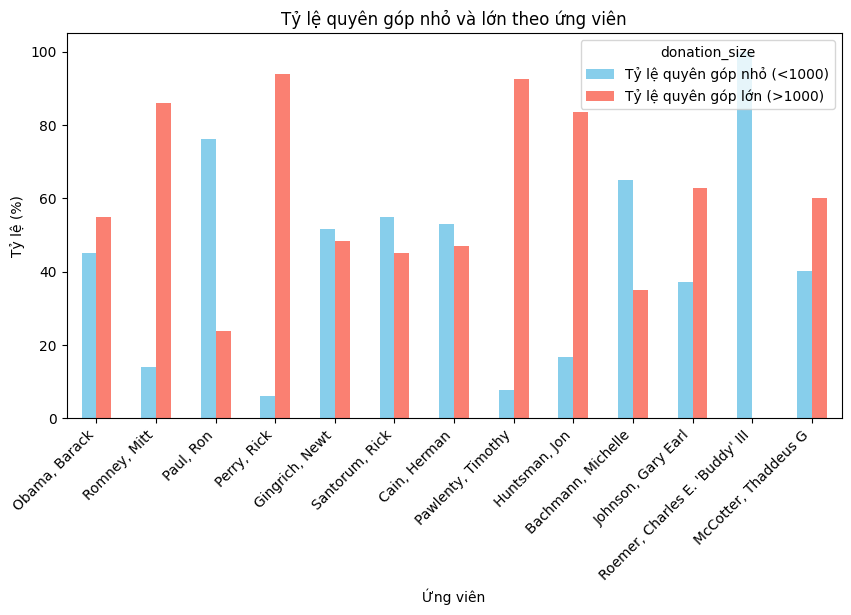

In [44]:
# Biểu đồ tỷ lệ quyên góp nhỏ vs lớn
donation_size_summary[["Tỷ lệ quyên góp nhỏ (<1000)", "Tỷ lệ quyên góp lớn (>1000)"]].plot(
    kind="bar",
    figsize=(10,5),
    title="Tỷ lệ quyên góp nhỏ và lớn theo ứng viên",
    color=["skyblue", "salmon"]
)
plt.ylabel("Tỷ lệ (%)")
plt.xlabel("Ứng viên")
plt.xticks(rotation=45, ha="right")
plt.show()


Nhận xét:
* Ứng viên Barack Obama có tỷ lệ quyên góp lớn (> $1000) cao hơn quyên góp nhỏ, cho thấy ông nhận được nhiều ủng hộ từ các nhà tài trợ có tiềm lực tài chính.
* Các ứng viên như Ron Paul, Gary Johnson, hay Charles Roemer lại có tỷ lệ quyên góp nhỏ (< $1000) nổi bật, phản ánh sự ủng hộ mạnh mẽ từ đông đảo cử tri cá nhân.
* Trong khi đó, những người như Mitt Romney, Rick Perry hay Jon Huntsman có tỷ lệ quyên góp lớn chiếm ưu thế tuyệt đối, cho thấy nguồn tài trợ tập trung chủ yếu từ giới doanh nghiệp và nhà tài phiệt.
* Nhìn chung, biểu đồ cho thấy sự khác biệt rõ ràng giữa các ứng viên trong việc thu hút quyên góp từ dân thường so với nguồn vốn lớn có tổ chức.

#### Ứng cử viên nào có lượng người ủng hộ đông đảo hơn

In [ ]:

support_summary = fec.groupby("cand_nm")["contbr_nm"].nunique().sort_values(ascending=False)

# Đưa về DataFrame cho dễ xem
support_summary = support_summary.reset_index()
support_summary.columns = ["Ứng viên", "Số người ủng hộ"]

support_summary


,Ứng viên,Số người ủng hộ
0,"Obama, Barack",185734
1,"Romney, Mitt",66042
2,"Paul, Ron",40461
3,"Gingrich, Newt",20642
4,"Santorum, Rick",20569
5,"Cain, Herman",12529
6,"Perry, Rick",11224
7,"Bachmann, Michelle",6661
8,"Roemer, Charles E. 'Buddy' III",5421
9,"Pawlenty, Timothy",3055


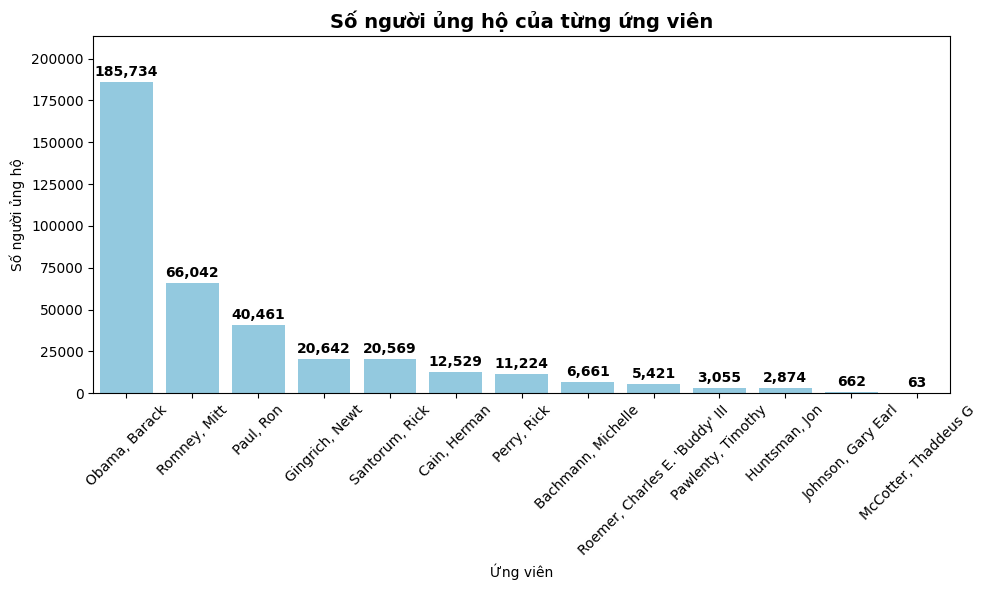

In [46]:
plt.figure(figsize=(10,6))
barplot = sns.barplot(
    data=support_summary,
    x="Ứng viên",
    y="Số người ủng hộ",
    color="skyblue"
)

# Hiển thị số người ủng hộ trên đầu cột
for i, row in support_summary.iterrows():
    barplot.text(
        i, 
        row["Số người ủng hộ"] + (support_summary["Số người ủng hộ"].max() * 0.01),  # canh cao 1%
        f"{row['Số người ủng hộ']:,}",  # format có dấu phẩy ngăn cách
        ha="center", va="bottom", fontsize=10, fontweight="bold"
    )
plt.ylim(0, support_summary["Số người ủng hộ"].max() * 1.15)
plt.title("Số người ủng hộ của từng ứng viên", fontsize=14, fontweight="bold")
plt.xlabel("Ứng viên")
plt.ylabel("Số người ủng hộ")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Nhận xét:
* Ứng viên Barack Obama có số lượng người ủng hộ cao nhất, vượt xa các ứng viên còn lại.
* Điều này cho thấy Obama nhận được nhiều khoản đóng góp nhỏ từ đông đảo cử tri, thay vì phụ thuộc vào một số ít nhà tài trợ lớn.
* Ngược lại, các ứng viên như Mitt Romney hay Ron Paul có ít người ủng hộ hơn, nhưng mỗi người thường đóng góp số tiền lớn hơn trung bình.
* Như vậy, Obama nổi bật với chiến lược huy động tài trợ đại chúng, thể hiện sự lan tỏa mạnh mẽ trong quần chúng.


### 3.4 Phân tích theo không gian địa lý


#### Bang nào đóng góp nhiều nhất cho mỗi ứng cử viên?

In [ ]:

state_donation = (
    fec.groupby(["cand_nm", "contbr_st"])["contb_receipt_amt"]
    .sum()
    .unstack(fill_value=0)   # chuyển thành dạng ma trận
)

# Lấy ra top 10 bang quyên góp nhiều nhất (tổng cho tất cả ứng viên)
top_states = state_donation.sum(axis=0).sort_values(ascending=False).head(10).index
state_top10 = state_donation[top_states]

# Chuẩn hóa theo hàng (ứng viên) để so sánh tương đối
state_ratio = state_top10.div(state_top10.sum(axis=1), axis=0)

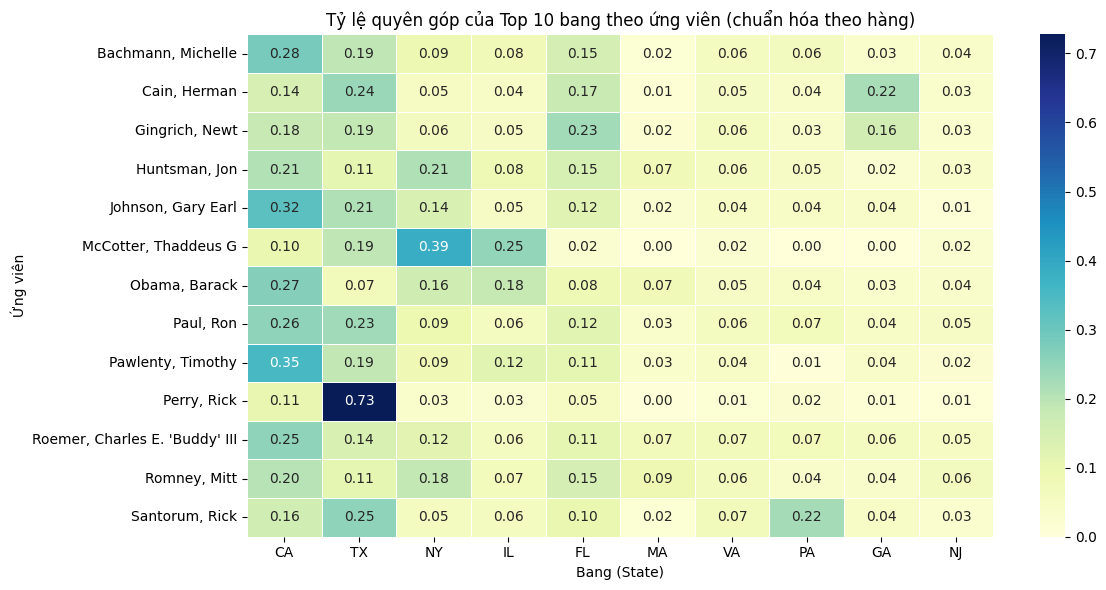

In [48]:
# Vẽ biểu đồ heatmap
# =============================================
plt.figure(figsize=(12,6))
sns.heatmap(
    state_ratio,
    cmap="YlGnBu",
    linewidths=0.5,
    annot=True,
    fmt=".2f"
)

plt.title("Tỷ lệ quyên góp của Top 10 bang theo ứng viên (chuẩn hóa theo hàng)")
plt.xlabel("Bang (State)")
plt.ylabel("Ứng viên")
plt.tight_layout()
plt.show()

Nhận xét:
* California (CA) là bang đóng góp nhiều nhất cho phần lớn ứng viên như Obama, Pawlenty, Johnson, Bachmann, thể hiện quy mô kinh tế lớn và mức độ tham gia chính trị cao.
* Texas (TX) nổi bật là bang ủng hộ mạnh Rick Perry (chiếm tới 73%), phản ánh sự ủng hộ tại quê nhà của ông.
* New York (NY) đóng góp đáng kể cho McCotter và Romney, hai ứng viên có sự hỗ trợ tốt từ giới tài chính.
* Nhìn chung, CA và TX là hai bang có ảnh hưởng lớn nhất trong quyên góp, vừa về số lượng ứng viên được ủng hộ vừa về tỷ trọng đóng góp.

#### Có sự khác biệt vùng miền (Bờ Đông / Bờ Tây) trong hành vi quyên góp không?

In [ ]:


# Xác định 2 vùng chính: Bờ Đông & Bờ Tây
east_coast = ["ME","NH","MA","RI","CT","NY","NJ","DE","MD","VA","NC","SC","GA","FL","PA"]
west_coast = ["CA","OR","WA","HI","AK"]

# Giữ lại dữ liệu chỉ thuộc 2 vùng này
fec_region = fec[fec["contbr_st"].isin(east_coast + west_coast)].copy()

# Hàm gán vùng tương ứng cho từng bang
def map_region(state):
    if state in east_coast:
        return "East Coast"
    elif state in west_coast:
        return "West Coast"
    else:
        return None

fec_region["Region"] = fec_region["contbr_st"].apply(map_region)
fec_region[["contbr_st", "Region"]].head()


,contbr_st,Region
18,CA,West Coast
19,CA,West Coast
20,CA,West Coast
21,CA,West Coast
22,CA,West Coast


In [50]:
# Chuẩn hóa tên đảng để dễ xử lý

# Thay "Democrat" / "Republican" thành "DEM" / "REP" cho gọn
fec_region["party"] = fec_region["party"].replace({
    "Democrat": "DEM",
    "Republican": "REP"
})

# Kiểm tra lại danh sách đảng có trong dữ liệu
fec_region["party"].unique()


array(['REP', 'DEM'], dtype=object)

In [51]:
# Tổng hợp tổng tiền quyên góp theo vùng và đảng

region_summary = (
    fec_region
    .groupby(["Region", "party"])["contb_receipt_amt"]
    .sum()
    .unstack(fill_value=0)
)

# Đảm bảo luôn có 2 cột DEM và REP
for col in ["DEM", "REP"]:
    if col not in region_summary.columns:
        region_summary[col] = 0

region_summary["Total"] = region_summary["DEM"] + region_summary["REP"]
region_summary


party,DEM,REP,Total
Region,,,
East Coast,"55,049,706","67,400,627","122,450,333"
West Coast,"30,375,913","25,463,678","55,839,591"


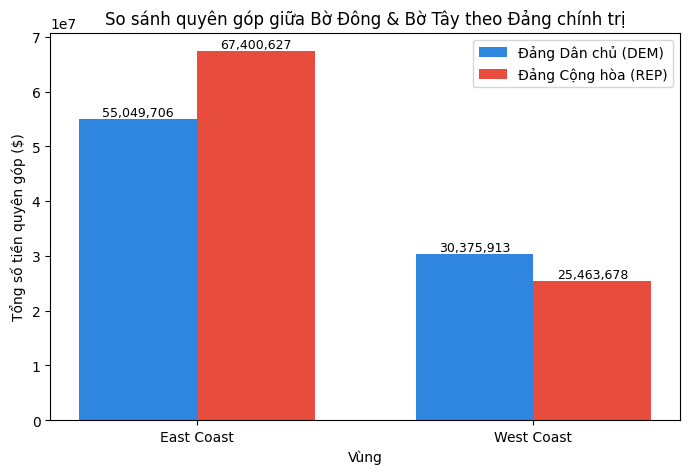

In [52]:

# Vẽ biểu đồ cột so sánh vùng & đảng
import matplotlib.pyplot as plt
import numpy as np

# Chuẩn bị dữ liệu
regions = region_summary.index
x = np.arange(len(regions))
width = 0.35

fig, ax = plt.subplots(figsize=(7,5))
bars1 = ax.bar(x - width/2, region_summary["DEM"], width, label="Đảng Dân chủ (DEM)", color="#2E86DE")
bars2 = ax.bar(x + width/2, region_summary["REP"], width, label="Đảng Cộng hòa (REP)", color="#E74C3C")

# Ghi nhãn số tiền lên đầu cột
for bar in bars1 + bars2:
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center', va='bottom', fontsize=9
    )

# Tùy chỉnh biểu đồ
ax.set_xlabel("Vùng")
ax.set_ylabel("Tổng số tiền quyên góp ($)")
ax.set_title("So sánh quyên góp giữa Bờ Đông & Bờ Tây theo Đảng chính trị")
ax.set_xticks(x)
ax.set_xticklabels(regions)
ax.legend()
plt.tight_layout()
plt.show()


Nhận xét:
* Có sự khác biệt rõ rệt giữa hai vùng trong hành vi quyên góp chính trị.
* Bờ Đông (East Coast) quyên góp nhiều hơn tổng thể và nghiêng về Đảng Cộng hòa (Republican Party).
* Bờ Tây (West Coast) tuy tổng quyên góp thấp hơn nhưng ủng hộ mạnh cho Đảng Dân chủ (Democratic Party).
* Điều này phản ánh sự khác biệt về đặc điểm kinh tế – xã hội và quan điểm chính trị giữa hai vùng, khi Bờ Đông mang tính truyền thống và doanh nghiệp hơn, còn Bờ Tây cởi mở và tiến bộ hơn.

## 4. Kết luận

Bộ dữ liệu quyên góp chính trị FEC 2012 cung cấp cái nhìn toàn diện về hành vi đóng góp của cử tri Hoa Kỳ trong cuộc bầu cử tổng thống năm 2012.

Dữ liệu ghi lại chi tiết thông tin của từng khoản quyên góp như người đóng góp, nghề nghiệp, nơi làm việc, vị trí địa lý, ứng cử viên nhận quyên góp, số tiền và thời gian quyên góp.

Những điểm rút ra:

* Nguồn dữ liệu phong phú, minh bạch, thể hiện rõ mối quan hệ giữa nghề nghiệp, khu vực sống và xu hướng ủng hộ chính trị.

* Các nghề nghiệp phổ biến như “RETIRED” (nghỉ hưu), “TEACHER”, “ENGINEER”, “PHYSICIAN” có tỷ lệ quyên góp cao.

* Mức quyên góp trung bình dao động từ vài chục đến vài nghìn USD, cho thấy sự tham gia tích cực của cá nhân trong tài trợ chính trị.

* Dữ liệu có thể được sử dụng để phân tích xu hướng ủng hộ theo vùng, thời gian và nhóm xã hội, hỗ trợ nghiên cứu về kinh tế – chính trị – xã hội trong bầu cử Mỹ.

# Kết thúc